<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Regressions/Linear_Regression_Medical_Cost_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

## Data Cleaning

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_encoded = pd.get_dummies(dataset)

## Training and Test Set

In [5]:
x = insurance_encoded.drop("charges",axis=1)

In [6]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [7]:
y = insurance_encoded['charges']

## Train Test Split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

## Building Model

In [9]:
x_train.shape

(1070, 11)

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape = (11,)),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(),metrics = ['mae'])

In [11]:
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 4s 18ms/step - loss: 13226.0586 - mae: 13226.0586
Epoch 2/100
34/34 [==============================] - 1s 16ms/step - loss: 12759.5791 - mae: 12759.5791
Epoch 3/100
34/34 [==============================] - 1s 16ms/step - loss: 11512.4619 - mae: 11512.4619
Epoch 4/100
34/34 [==============================] - 1s 29ms/step - loss: 9273.3809 - mae: 9273.3809
Epoch 5/100
34/34 [==============================] - 1s 19ms/step - loss: 7611.5620 - mae: 7611.5620
Epoch 6/100
34/34 [==============================] - 0s 13ms/step - loss: 7403.2988 - mae: 7403.2988
Epoch 7/100
34/34 [==============================] - 1s 22ms/step - loss: 7370.0552 - mae: 7370.0552
Epoch 8/100
34/34 [==============================] - 1s 18ms/step - loss: 7337.6440 - mae: 7337.6440
Epoch 9/100
34/34 [==============================] - 1s 29ms/step - loss: 7304.6719 - mae: 7304.6719
Epoch 10/100
34/34 [==============================] - 0s 14ms/step - loss: 7273.1450 

In [12]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3600.2981 - mae: 3600.2981


[3600.298095703125, 3600.298095703125]

In [13]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape = (11,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
model_2.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(),metrics = ["mae"])

In [16]:
history = model_2.fit(x_train,y_train,epochs = 400)

Epoch 1/400
34/34 [==============================] - 0s 5ms/step - loss: 3483.2261 - mae: 3483.2261
Epoch 2/400
34/34 [==============================] - 0s 5ms/step - loss: 3477.7527 - mae: 3477.7527
Epoch 3/400
34/34 [==============================] - 0s 5ms/step - loss: 3475.2595 - mae: 3475.2595
Epoch 4/400
34/34 [==============================] - 0s 6ms/step - loss: 3480.6458 - mae: 3480.6458
Epoch 5/400
34/34 [==============================] - 0s 7ms/step - loss: 3477.0308 - mae: 3477.0308
Epoch 6/400
34/34 [==============================] - 0s 5ms/step - loss: 3483.8108 - mae: 3483.8108
Epoch 7/400
34/34 [==============================] - 0s 9ms/step - loss: 3489.0112 - mae: 3489.0112
Epoch 8/400
34/34 [==============================] - 0s 8ms/step - loss: 3483.6604 - mae: 3483.6604
Epoch 9/400
34/34 [==============================] - 0s 7ms/step - loss: 3479.4199 - mae: 3479.4199
Epoch 10/400
34/34 [==============================] - 0s 7ms/step - loss: 3486.7485 - mae: 3486.7485

Text(0.5, 0, 'epochs')

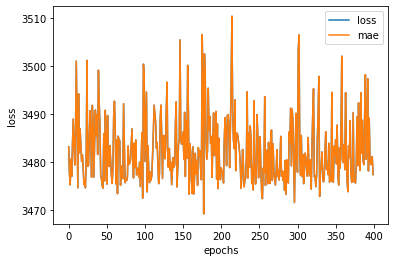

In [18]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing Data(normalization and standardization)

In [19]:
dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:

column_transformer = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown="ignore"),['smoker','sex','region'])
                                              
)

In [42]:
x = dataset.drop("charges",axis = 1)
y = dataset['charges']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [44]:
column_transformer.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['smoker', 'sex', 'region'])])

In [45]:
x_train_normal = column_transformer.transform(x_train)
x_test_normal = column_transformer.transform(x_test)

In [46]:
x_train_normal.shape,x_train.shape

((1070, 11), (1070, 6))

In [47]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape = (11,)),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(),metrics = ['mae'])

In [49]:
model.fit(x_train_normal,y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 7ms/step - loss: 13317.0107 - mae: 13317.0107
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 13241.9678 - mae: 13241.9678
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 13068.4814 - mae: 13068.4814
Epoch 4/100
34/34 [==============================] - 0s 9ms/step - loss: 12744.0576 - mae: 12744.0576
Epoch 5/100
34/34 [==============================] - 0s 11ms/step - loss: 12215.6484 - mae: 12215.6484
Epoch 6/100
34/34 [==============================] - 0s 9ms/step - loss: 11460.0957 - mae: 11460.0957
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 10589.9766 - mae: 10589.9766
Epoch 8/100
34/34 [==============================] - 0s 10ms/step - loss: 9735.2344 - mae: 9735.2344
Epoch 9/100
34/34 [==============================] - 0s 10ms/step - loss: 8994.5049 - mae: 8994.5049
Epoch 10/100
34/34 [==============================] - 0s 10ms/step - loss: 8455.759